<a href="https://colab.research.google.com/github/Yyssjj96/__practice___/blob/main/DAU%EA%B5%AC%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

좋은 지표란 ?
1.   이해하기 쉬워야한다.
  - 직관적이야 하고 이를 통해 행동을 유도 할 수 있어야 한다.
       - 예 : 우리는 이번에 구매전환율을 KPI(핵심성과지표)로 삼고, 전환율을 높이는 데 집중
2.  상대적이다.
  - 단순 집계한 데이터보다 기간별, 사용자별, 경쟁자별로 비교 할 수 있으면 이해하기 좋다.
     - 예 : 8월 1달간 사용자수는 1만명이고, 지난 7월 대비 20% 증가
3. 비율료 표현
  - 비율을 통해 비교한다.
    - 예 : 8월달 신규 고객수 대비 이탈 고객수의 비중은 1%




In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/2019-Dec.csv')

In [3]:
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
5,2019-12-01 00:00:09 UTC,view,5773361,1487580005134238553,NaN,runail,2.62,560109803,38cf4ba1-4a0a-4c9e-b870-46685d105f95
6,2019-12-01 00:00:18 UTC,cart,5629988,1487580009311764506,NaN,NaN,1.19,579966747,1512be50-d0fd-4a92-bcd8-3ea3943f2a3b
7,2019-12-01 00:00:22 UTC,view,5807805,1487580005713052531,NaN,ingarden,4.44,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
8,2019-12-01 00:00:27 UTC,view,5588608,1487580008145748965,NaN,roubloff,5.40,546170008,676d9fcc-2a4f-4448-b49d-136f2e4208c1
9,2019-12-01 00:00:34 UTC,cart,5335,1487580009605365797,NaN,runail,0.40,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [5]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3474821
brand            1510289
price                  0
user_id                0
user_session         779
dtype: int64

In [9]:
df.price.describe()

count    3.533286e+06
mean     8.871856e+00
std      1.986474e+01
min     -7.937000e+01
25%      2.060000e+00
50%      4.210000e+00
75%      7.140000e+00
max      3.277800e+02
Name: price, dtype: float64

<Axes: >

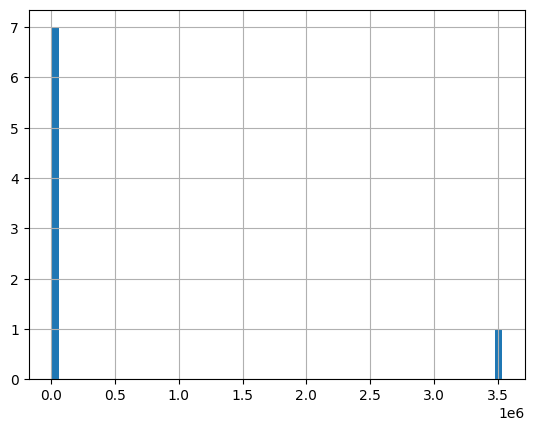

In [10]:
df.price.describe().hist(bins=60)

유저 데이터
- 단순히 가입된 유저가 많은 것 보단 활동하는 유저의 수도 고려해보는 것이 좋다.
유니크한 사용자수를 구해보자.
- dau , mau = 일간, 월간 유니크한 사용자의 수
- dau/mau = 사용자 참여도를 나타내는 중요한 지표 비율이 높을 수록 자주 방문함을 의미
- dau는 특정 사용자의 수를 파악하는 것엔 좋지만, 방문 이외에 다른 활동을 파악하는 것은 파악하기 힘든 단점이 있다.

In [11]:
df['event_date'] = df['event_time'].str[:10]

In [12]:
df['event_time_dt'] = pd.to_datetime(df['event_time'])

In [13]:
df['event_time_dt'].describe()

count                                3533286
mean     2019-12-14 22:34:40.905320960+00:00
min                2019-12-01 00:00:00+00:00
25%      2019-12-07 20:47:03.249999872+00:00
50%                2019-12-14 12:24:25+00:00
75%         2019-12-21 19:27:57.500000+00:00
max                2019-12-31 23:59:57+00:00
Name: event_time_dt, dtype: object

In [14]:
dau_data = df.groupby('event_date')[['user_id']].nunique().reset_index()

In [28]:
dau_data = dau_data.rename(columns = {'user_id' : 'user_count'})

In [31]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dau_data = dau_data.iloc[:-1,:]

In [39]:
dau_data

,event_date,user_count
0,2019-12-01,17540
1,2019-12-02,19391
2,2019-12-03,18735
3,2019-12-04,18836
4,2019-12-05,18183
5,2019-12-06,16948
6,2019-12-07,15508
7,2019-12-08,16835
8,2019-12-09,19777
9,2019-12-10,19336


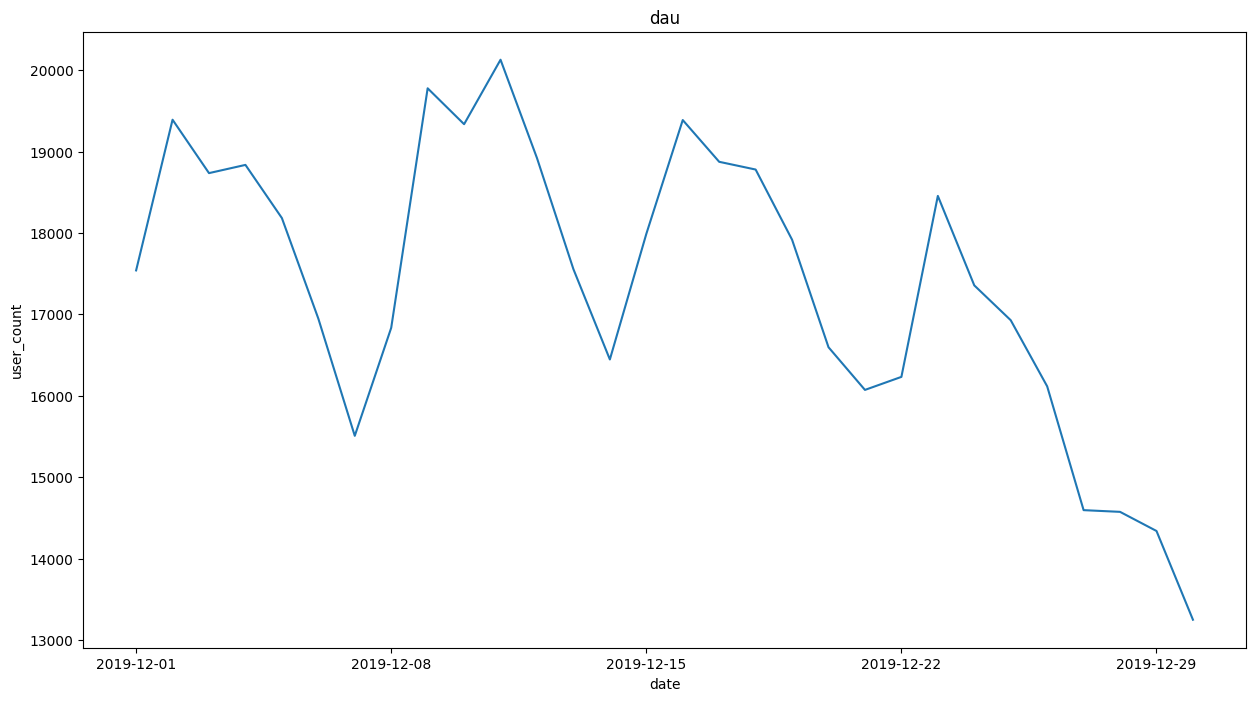

In [38]:
s = sns.lineplot(x='event_date',y='user_count',data=dau_data)
s.figure.set_size_inches(15,8)
s.xaxis.set_major_locator(ticker.MultipleLocator(7))
s.set_title('dau')
s.set_xlabel('date')
s.set_ylabel('user_count')
plt.show()
